# DATA WRANGLING PROJECT 
## International Visitors
This notebook consists of the wrangling involved in `International Visitors Data`

## Section 1 - Wrangling the International Visitors data

The steps are as follows:
 1. Treating the missing values
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure

In [134]:
#Loading the required libraries:
library(tidyverse)
library(sqldf)
library(stringr)
library(data.table)
library(ggplot2)

### Treating the `Missing Values`:

In [108]:
#Reading CSV file into dataframe

df <- read_csv("F:/UoC/MADS/DATA422 - Data Wrangling/Project/SampleDatasets/international-visitor-survey-zip-part-1/vw_IVSSurveyMainHeader.csv")

#Selecting the required columns and Filtering the records from the dataframe into new dataframe to proceed further

df <- df %>% 
        select(Year,ArrivalMonth,CORNextYr,Airport,POV,AgeRange,MainAccommTypeUsed,LengthOfStay,TotalSpendInNZ,Gender,Qtr) %>% 
        filter(Year >= 2014)

unclean_df <- df
unclean_df %>% glimpse

Parsed with column specification:
cols(
  .default = col_character(),
  SurveyResponseID = col_double(),
  ResponseID = col_double(),
  NumberOfVisitsToNZ = col_double(),
  ArrivalDay = col_double(),
  ArrivalYear = col_double(),
  NoDaysInNZ = col_double(),
  FlightClass = col_logical(),
  VisitedAUSonvisit = col_logical(),
  NoDaysInAustralia = col_logical(),
  NoDaysInAustraliaNotKnown = col_logical(),
  GroupTour = col_logical(),
  PackageDeal = col_logical(),
  PkgIncludedAirfare = col_logical(),
  NoNightsOtherCountry = col_double(),
  TravelParty = col_logical(),
  NoPeopleOver15 = col_double(),
  NoPeopleunder15 = col_double(),
  TotalCost = col_double(),
  NoPeopleSpendFor = col_double(),
  LengthOfStay = col_double()
  # ... with 11 more columns
)
See spec(...) for full column specifications.
Warning message:
"47344 parsing failures.
   row               col           expected                        actual                                                                       

Observations: 51,140
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <dbl> 17, 23, 14, 6, 75, 8, 14, 33, 7, 27, 5, 6, 5, 36...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


In [109]:
#Replaced the 'NA' value as 'NOT SURE', since it is one of the categorical value used in survey for Accomodation Type 

unclean_df$MainAccommTypeUsed <- as.character(unclean_df$MainAccommTypeUsed)
unclean_df$MainAccommTypeUsed <- ifelse(is.na(unclean_df$MainAccommTypeUsed),'NOT SURE', unclean_df$MainAccommTypeUsed)
unclean_df %>% plyr::count("MainAccommTypeUsed")   # using the library "plyr" for count function

MainAccommTypeUsed,freq
<chr>,<int>
A house you own,605
Another place where you pay to park a caravan or campervan / motorhome overnight,396
Backpackers,2325
Bed and Breakfast,1493
Camping at a National Park / Department of Conservation camping ground,656
Farm-stay or Home-stay,652
"Free camping - staying at a place that is NOT an official camp site, in a tent, caravan, campervan / motorhome",515
Hotel,10744
House / flat that you paid some rent for,3878


In [110]:
#Replaced the NA value in Arrival Month as Not specified

unclean_df <- unclean_df %>%
                  mutate(ArrivalMonth = replace(ArrivalMonth, is.na(ArrivalMonth), "Not Specified"))
#unclean_df %>% count("ArrivalMonth")

In [111]:
#Grouped by the specific columns and found the average value of stay from a Lengthofstay column for that particular category
#and used that to fill any NULL value records within that category.
#Here the category means, the first 5 columns in our dataframe i.e. Year,ArrivalMonth,CORNextYr,Airport,POV: 

aggr_stay <- sqldf("select Year,ArrivalMonth,CORNextYr,Airport,POV, avg(LengthOfStay) 
                    as avg_stay,Qtr from unclean_df group by Year,ArrivalMonth,CORNextYr,Airport,POV")
aggr_stay %>% head()

Year,ArrivalMonth,CORNextYr,Airport,POV,avg_stay,Qtr
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2014,April,Argentina,Auckland,Holiday / vacation,243.000000,2014 4
2014,April,Australia,Auckland,Business,5.625000,2014 2
2014,April,Australia,Auckland,Conference / convention,4.500000,2014 2
2014,April,Australia,Auckland,Education,6.000000,2014 2
2014,April,Australia,Auckland,Holiday / vacation,8.142857,2014 2
2014,April,Australia,Auckland,Other,10.500000,2014 2


In [112]:
#joining the two dataframes unclean_df and aggr based on the category (year, arrivalmonth, CORNextyr, Airport and POV)

sam1 <- unclean_df
sam2 <- aggr_stay
join <- sqldf("select * from sam1 left outer join sam2 on sam1.Year = sam2.Year
               where sam1.ArrivalMonth = sam2.ArrivalMonth and sam1.CORNextYr = sam2.CORNextYr and sam1.Airport = sam2.Airport and sam1.POV = sam2.POV")
join %>% glimpse

Observations: 51,140
Variables: 18
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <dbl> 17, 23, 14, 6, 75, 8, 14, 33, 7, 27, 5, 6, 5, 36...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...
$ Year..12           <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth..1

In [113]:
#Replacing the missing values in Lengthofstay column as Not specified

join <- join %>%
            mutate(LengthOfStay = replace(LengthOfStay, is.na(LengthOfStay), "Not Specified"))

#Replacing the Not specified values in Lengthofstay column with average value in ang_stay column

position <- join$LengthOfStay %in% "Not Specified"
join[position,c(8)] <- join[position,c(17)]

In [114]:
#Selecting the required columns from a join dataframe into final dataframe

final <- join %>% select(c(1:11))
final %>% glimpse

Observations: 51,140
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <chr> "17", "23", "14", "6", "75", "8", "14", "33", "7...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


In [115]:
#Removed 21 rows which don't have values (NA)in Number_of_Days column

final[complete.cases(final[ ,"LengthOfStay"]),] %>% glimpse()

#Arranged column in requierd order

final <- final %>% select("Year","ArrivalMonth","Qtr","CORNextYr","Airport","POV","AgeRange","MainAccommTypeUsed","LengthOfStay","TotalSpendInNZ","Gender")
final %>% head()

Observations: 51,119
Variables: 11
$ Year               <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, ...
$ ArrivalMonth       <chr> "March", "March", "March", "April", "January", "...
$ CORNextYr          <chr> "United States of America", "United States of Am...
$ Airport            <chr> "Auckland", "Auckland", "Auckland", "Auckland", ...
$ POV                <chr> "Holiday / vacation", "Holiday / vacation", "Hol...
$ AgeRange           <chr> "65 - 69", "55 - 59", "60 - 64", "25 - 29", "30 ...
$ MainAccommTypeUsed <chr> "Bed and Breakfast", "Luxury Accommodation, 5-st...
$ LengthOfStay       <chr> "17", "23", "14", "6", "75", "8", "14", "33", "7...
$ TotalSpendInNZ     <dbl> 7.092227e+02, 1.418445e+04, 9.078051e+03, 1.8991...
$ Gender             <chr> "Female", "Male", "Male", "Male", "Female", "Mal...
$ Qtr                <chr> "2017 2", "2017 2", "2017 2", "2017 2", "2017 2"...


Year,ArrivalMonth,Qtr,CORNextYr,Airport,POV,AgeRange,MainAccommTypeUsed,LengthOfStay,TotalSpendInNZ,Gender
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2017,March,2017 2,United States of America,Auckland,Holiday / vacation,65 - 69,Bed and Breakfast,17,709.2227,Female
2017,March,2017 2,United States of America,Auckland,Holiday / vacation,55 - 59,"Luxury Accommodation, 5-star Hotel, Luxury Lodge",23,14184.4540,Male
2017,March,2017 2,United States of America,Auckland,Holiday / vacation,60 - 64,Hotel,14,9078.0505,Male
2017,April,2017 2,Canada,Auckland,Holiday / vacation,25 - 29,Hotel,6,1899.1711,Male
2017,January,2017 2,Australia,Auckland,Visiting friends / relatives,30 - 34,Staying with family or friends,75,1000.0000,Female
2017,March,2017 2,United States of America,Auckland,Visiting friends / relatives,45 - 49,Staying with family or friends,8,9929.1178,Male


In [128]:
#Renaming the columns
clean_df <- dplyr::rename(final, 
                     Year = Year,
                     Month = ArrivalMonth,
                     Quarter = Qtr,
                     Country = CORNextYr,
                     NZ_City = Airport,
                     Visit_Purpose = POV,
                     Number_of_People = Gender,
                     Number_of_Days = LengthOfStay,
                     Accommadation_Type = MainAccommTypeUsed,
                     Age_Range = AgeRange,
                     Total_Spending = TotalSpendInNZ,      
                )
clean_df$Number_of_Days <- as.double(clean_df$Number_of_Days)

The below code can be executed if you want to see the output of the data after cleaning.

In [117]:
# Export the final(cleaned) dataframe into csv format

#write_csv(final,"Tourism_Last5.csv")

### Aggregating the columns
This step involves aggregating the last 5 columns of the dataframe by the first 5 columns in each level separately.

Now, Lets create a function to aggregate each columns and then automate it. 

In [118]:
#Creating a function to calculate Average days spent
avgdays_c <- function(df){
                aggr_days <- df %>% 
                select(c(1:6,9)) %>%
                group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                dplyr::summarise(AvgDaysSpent = mean(Number_of_Days))
                return(aggr_days)
                    }


In [119]:
#creating functions to calculate the preferred accommodation type
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

hotel_c <- function(df){
    
            select_hotel <- df %>% 
                    select(c(1:6,8))

            aggr_hotel <- aggregate(x = select_hotel, by = list(select_hotel$Year,select_hotel$Month,select_hotel$Quarter,
                                                                select_hotel$Country,select_hotel$NZ_City,select_hotel$Visit_Purpose),
                                                                FUN = getmode) %>%
                          select(-c(1,2,3,4)) %>%
                          arrange(desc(Year))
            return(aggr_hotel)
    }
#a <- hotel_c(clean_df)  
#write_csv(a,"F:/UoC/MADS/DATA422 - Data Wrangling/Project/Output/EDA/Hotel_Test.csv")

In [120]:
#creating a function to calculate the Average Age

age_calc <- function(df) {
df %>%
    mutate(Age = case_when(df$Age_Range == "Under 20" ~ "20",
           df$Age_Range == "20 - 24" ~ "22",
           df$Age_Range == "25 - 29" ~ "27",
           df$Age_Range == "30 - 34" ~ "32",
           df$Age_Range == "35 - 39" ~ "37",
           df$Age_Range == "40 - 44" ~ "42",
           df$Age_Range == "45 - 49" ~ "47",
           df$Age_Range == "50 - 54" ~ "52",
           df$Age_Range == "55 - 59" ~ "57",
           df$Age_Range == "60 - 64" ~ "62",
           df$Age_Range == "65 - 69" ~ "67",
           df$Age_Range == "70 - 74" ~ "72",
           df$Age_Range == "75 or older" ~ "80",
           df$Age_Range == "Rather not say" ~ "40")) %>%
        mutate (Age = as.numeric(Age)) %>%
        group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
        summarise(Age = mean(Age))
}

age_c <- function(df) {
        select_age <- df %>% 
                        select(c(1:7))

        aggr_age <- select_age %>% 
                        age_calc()
        return(aggr_age)
    }

In [121]:
#creating function to calculate the Average spendings

avgspend_c <- function(df){
                aggr_spend <- df %>% 
                                select(c(1:6,10)) %>%
                                group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                                summarise(AvgSpending = mean(Total_Spending))
                return(aggr_spend)
    }

In [129]:
#creating a function to calculate the Number of people

nppl_c <- function(df) {
            aggr_ppl <- df %>% 
                        select(c(1:6,11)) %>%
                        group_by(Year,Month,Quarter,Country,NZ_City,Visit_Purpose) %>%
                        summarise(Number_of_People = n())
                        return(aggr_ppl)
                        }

In [123]:
#consolidating all the functions into one function

#df_initial
add_aggrcolumns <- function(df) {
#df1
df1 <- df %>% hotel_c()

#df2
df2 <- df %>% age_c() 

#df3
df3 <- df %>% avgdays_c()

#df4
df4 <- df %>% avgspend_c()

#df5
df5 <- df %>% nppl_c()

#mergeall
df_final <- Reduce(function(x, y) merge(x, y), list(df1, df2, df3, df4, df5))

#df_final
return(df_final)    
    
  }

After creating all the functions, Lets apply it to the cleaned dataframe to get the desired structure

In [130]:
#Assigning the final aggregated clean dataframe to the new data frame for later use.
visitors_data <- clean_df %>% add_aggrcolumns()

In [131]:
visitors_data %>% glimpse

Observations: 13,121
Variables: 13
$ Year               <dbl> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, ...
$ Month              <chr> "April", "April", "April", "April", "April", "Ap...
$ Quarter            <chr> "2014 1", "2014 1", "2014 1", "2014 2", "2014 2"...
$ Country            <chr> "Czech Republic", "England", "France", "Australi...
$ NZ_City            <chr> "Auckland", "Christchurch", "Auckland", "Aucklan...
$ Visit_Purpose      <chr> "Other", "Holiday / vacation", "Other", "Busines...
$ Group.5            <chr> "Auckland", "Christchurch", "Auckland", "Aucklan...
$ Group.6            <chr> "Other", "Holiday / vacation", "Other", "Busines...
$ Accommadation_Type <chr> "Backpackers", "Motel, Motor Inn or Serviced Apa...
$ Age                <dbl> 22.00000, 67.00000, 27.00000, 39.50000, 30.75000...
$ AvgDaysSpent       <dbl> 352.000000, 22.000000, 357.000000, 5.625000, 4.5...
$ AvgSpending        <dbl> 22000.0000, 3662.9903, 5000.0000, 1122.4051, 119...
$ Number_of_Peopl

In [148]:
visitors_data %>% head

Year,Month,Quarter,Country,NZ_City,Visit_Purpose,Group.5,Group.6,Accommadation_Type,Age,AvgDaysSpent,AvgSpending,Number_of_People
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
2014,April,2014 1,Czech Republic,Auckland,Other,Auckland,Other,Backpackers,22.00,352.000,22000.0000,1
2014,April,2014 1,England,Christchurch,Holiday / vacation,Christchurch,Holiday / vacation,"Motel, Motor Inn or Serviced Apartment",67.00,22.000,3662.9903,1
2014,April,2014 1,France,Auckland,Other,Auckland,Other,House / flat that you paid some rent for,27.00,357.000,5000.0000,1
2014,April,2014 2,Australia,Auckland,Business,Auckland,Business,"Motel, Motor Inn or Serviced Apartment",39.50,5.625,1122.4051,8
2014,April,2014 2,Australia,Auckland,Conference / convention,Auckland,Conference / convention,"Luxury Accommodation, 5-star Hotel, Luxury Lodge",30.75,4.500,1190.8391,4
2014,April,2014 2,Australia,Auckland,Education,Auckland,Education,Staying with family or friends,27.00,6.000,649.5486,1


### Section - 2: Building the data model

Inorder to avoid confusion, rest of the data sets are wrangled in a different notebook. To get the ouput files of those data sets run the respective notebook files as mentioned in <b>`read_me.txt`</b> file.

#### `After executing all the other notebooks , go to section - 3 given below.`

### Section - 3: Merging the datasets and Visualization

This section involves the step of merging other entities such as FoodPrice, HouseRental, Crime with International Visitors (IVS) data to create visualizations and make inferences from it.

The steps are as follows:
   1. Here for each visualization we will be joining different datasets as required to plot the graph
   2. Plotting the graph
    
Since we have more number of records in the final dataframe of IVS, we will be filtering with certain fields such as Year and NZ_City for the purpose of visualization.

With the final data model, as mentioned in the project report we can join all four entities with the key fields such as Year, Month, Quarter, NZ_City for further analysis. This is why we shaped all the datasets into a common structure. 

### Visualization on IVS Data

First, Lets create plots and inferences from IVS data followed by the final data model.

In [136]:
#creating a dataframe for plotting
vis1 <- visitors_data  %>% select(Year,NZ_City,Number_of_People) %>% group_by(Year,NZ_City) %>% summarise(Total_Visitors = sum(Number_of_People))

vis1

Year,NZ_City,Total_Visitors
<dbl>,<chr>,<int>
2014,Auckland,6913
2014,Christchurch,2192
2014,Queenstown,353
2014,Wellington,575
2015,Auckland,6514
2015,Christchurch,2227
2015,Queenstown,157
2015,Wellington,605
2016,Auckland,5299


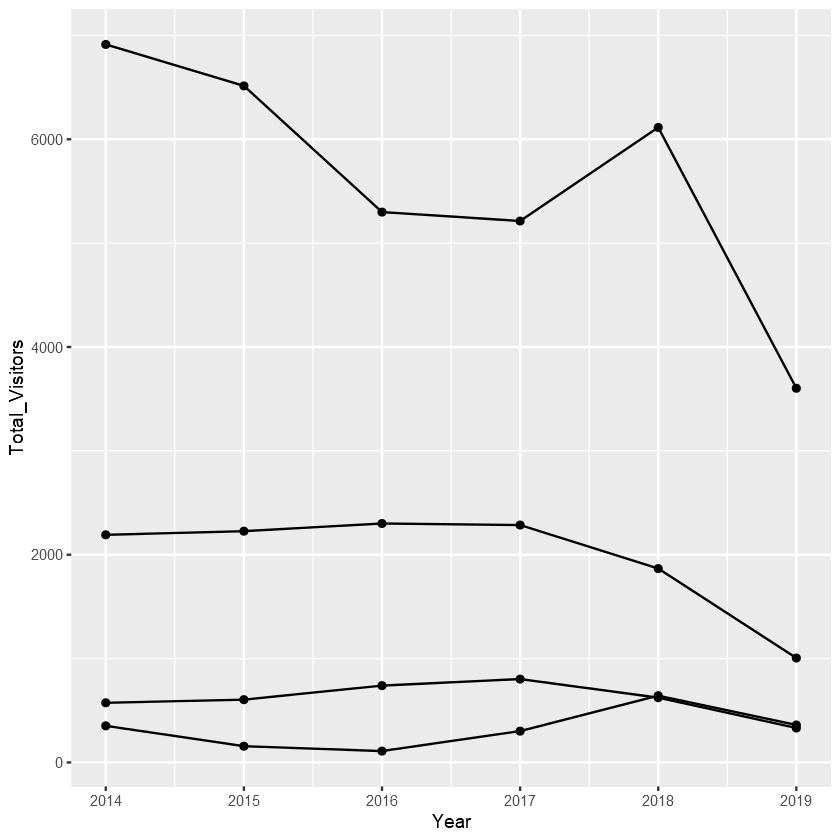

In [137]:
#A line chart that compares the trend of number of visitors to each city over the last 5 years.

ggplot(data= vis1, aes(x= Year, y=Total_Visitors, group= NZ_City)) +
  geom_line()+
  geom_point()

In [139]:
#creating a dataframe for plotting bar chart
vis2 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Christchurch" | NZ_City == "Auckland" ) %>% 
        select(Year,NZ_City,Country,Number_of_People) %>% group_by(Year,NZ_City,Country) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis2

Selecting by Total_Visitors


Year,NZ_City,Country,Total_Visitors
<dbl>,<chr>,<chr>,<int>
2018,Auckland,"China, People's Republic of",881
2018,Auckland,Australia,738
2018,Auckland,Japan,639
2018,Auckland,United States of America,628
2018,Christchurch,Australia,625
2018,Auckland,England,537
2018,Christchurch,England,239
2018,Christchurch,Germany,164
2018,Christchurch,"China, People's Republic of",123


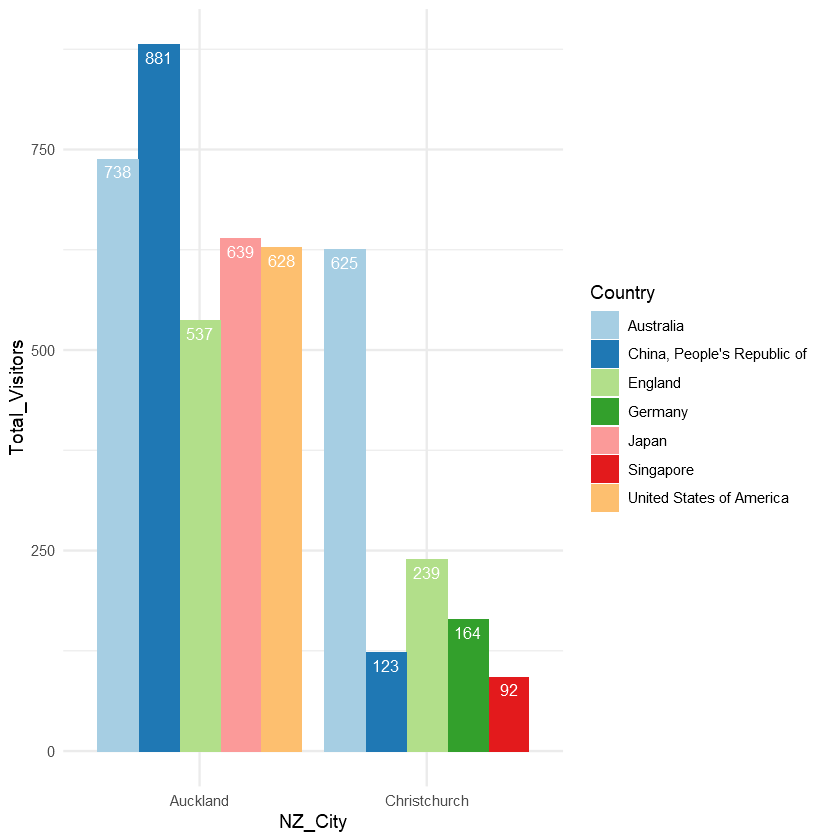

In [140]:
#A grouped bar chart that compares the number of visitors to Auckland and Christchurch city in the last year.

ggplot(data= vis2, aes(x=NZ_City, y= Total_Visitors, fill=Country)) +
  geom_bar(stat="identity", position=position_dodge())+
  geom_text(aes(label= Total_Visitors), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5)+
  scale_fill_brewer(palette="Paired")+
  theme_minimal()

In [142]:
#creating a dataframe for plotting pie chart
vis3 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Christchurch") %>% 
        select(Year,NZ_City,Visit_Purpose,Number_of_People) %>% group_by(Year,NZ_City,Visit_Purpose) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis3

Selecting by Total_Visitors


Year,NZ_City,Visit_Purpose,Total_Visitors
<dbl>,<chr>,<chr>,<int>
2018,Christchurch,Holiday / vacation,1390
2018,Christchurch,Visiting friends / relatives,351
2018,Christchurch,Business,60
2018,Christchurch,Other,29
2018,Christchurch,Education,25


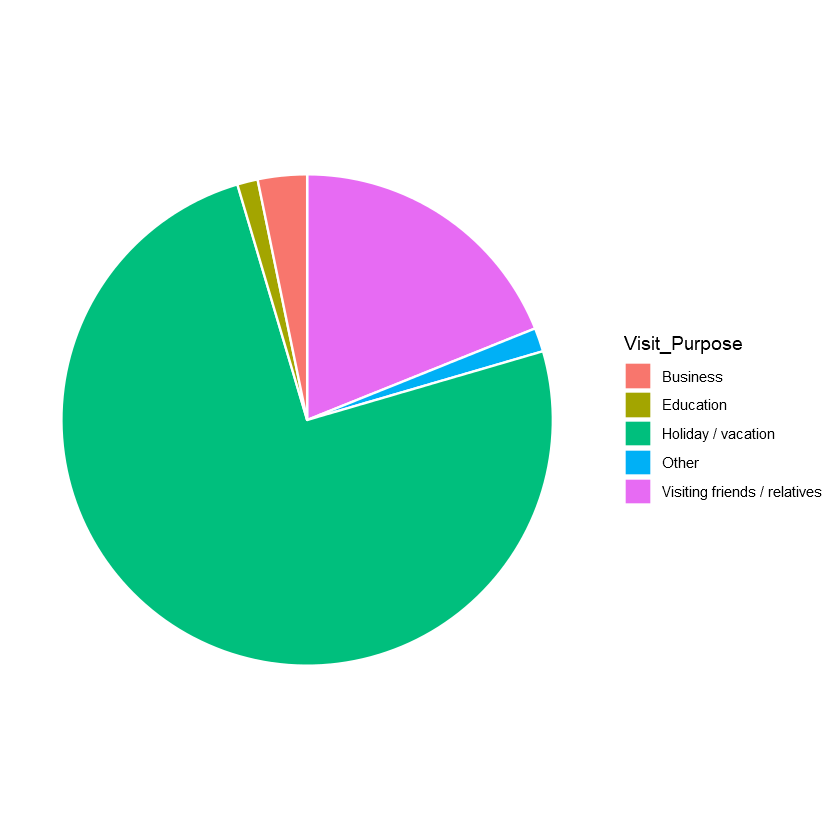

In [145]:
#A pie that compares the number of visitors to Christchurch city in the last year by the Purpose of Visit.

ggplot(vis3, aes(x = "", y = Total_Visitors , fill = Visit_Purpose)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  theme_void()

In [146]:
#creating a dataframe for plotting pie chart
vis4 <- visitors_data %>% filter(Year == 2018) %>% filter(NZ_City == "Auckland") %>% 
        select(Year,NZ_City,Visit_Purpose,Number_of_People) %>% group_by(Year,NZ_City,Visit_Purpose) %>% 
        summarise(Total_Visitors = sum(Number_of_People)) %>% arrange(desc(Total_Visitors)) %>%
        top_n(5)

vis4

Selecting by Total_Visitors


Year,NZ_City,Visit_Purpose,Total_Visitors
<dbl>,<chr>,<chr>,<int>
2018,Auckland,Holiday / vacation,3950
2018,Auckland,Visiting friends / relatives,1340
2018,Auckland,Business,347
2018,Auckland,Other,203
2018,Auckland,Education,138


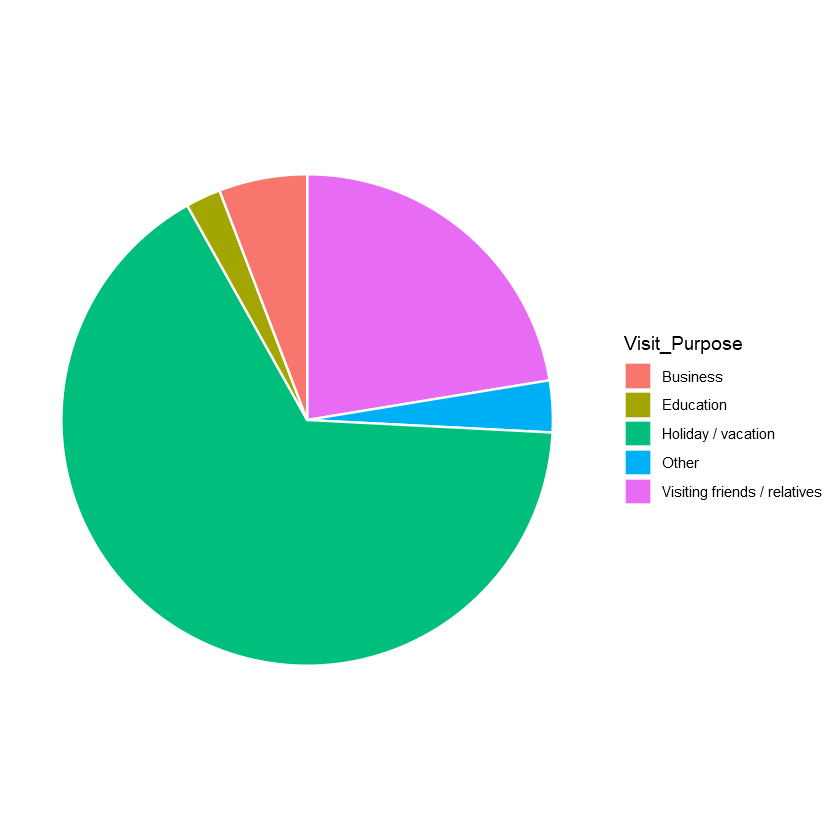

In [147]:
#A pie that compares the number of visitors to Auckland city in the last year by the Purpose of Visit.

ggplot(vis4, aes(x = "", y = Total_Visitors , fill = Visit_Purpose)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
 # geom_text(aes(label = Visit_Purpose ), color = "white")+
  #scale_fill_manual(values = mycols) +
  theme_void()